In [1]:
import pandas as pd 

#loading merged datasets
df = pd.read_csv("C:/Users/prina/Downloads/stress detection/data/merged_data.csv")
df.head()
print(df.shape)

C:\Users\prina\AppData\Local\Temp\ipykernel_3012\550392083.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/prina/Downloads/stress detection/data/merged_data.csv")


(11509051, 9)


In [2]:
df.head()

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.124999936,2.0


# EDA

In [3]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
df.head()
df.describe(include='all')


Shape: (11509051, 9)

Data Types:
 X           float64
Y           float64
Z           float64
EDA         float64
HR          float64
TEMP        float64
id           object
datetime     object
label       float64
dtype: object


,X,Y,Z,EDA,HR,TEMP,id,datetime,label
count,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07,11509051,11509051,1.150905e+07
unique,NaN,NaN,NaN,NaN,NaN,NaN,18,10628304,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,E4,2020-06-23 18:50:00.000000000,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,1487871,4,NaN
mean,-2.823775e+01,-9.091032e-01,2.382449e+01,3.502127e+00,8.576090e+01,3.223435e+01,NaN,NaN,1.554202e+00
std,3.142310e+01,3.343382e+01,2.985317e+01,5.656541e+00,1.419642e+01,2.260516e+00,NaN,NaN,7.891827e-01
min,-1.280000e+02,-1.280000e+02,-1.280000e+02,0.000000e+00,5.100000e+01,2.409000e+01,NaN,NaN,0.000000e+00
25%,-5.200000e+01,-1.900000e+01,4.000000e+00,2.242060e-01,7.672000e+01,3.019000e+01,NaN,NaN,1.000000e+00
50%,-3.300000e+01,1.000000e+00,2.500000e+01,1.157407e+00,8.390000e+01,3.257000e+01,NaN,NaN,2.000000e+00
75%,-1.400000e+01,1.700000e+01,4.900000e+01,4.077436e+00,9.310000e+01,3.425000e+01,NaN,NaN,2.000000e+00


# Missing value and outliers 

In [4]:
# Missing values
print("Missing values per column:\n", df.isnull().sum())

# Duplicates
print("Duplicate rows:", df.duplicated().sum())


Missing values per column:
 X           0
Y           0
Z           0
EDA         0
HR          0
TEMP        0
id          0
datetime    0
label       0
dtype: int64
Duplicate rows: 105606


In [5]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)


# Target var distribution 

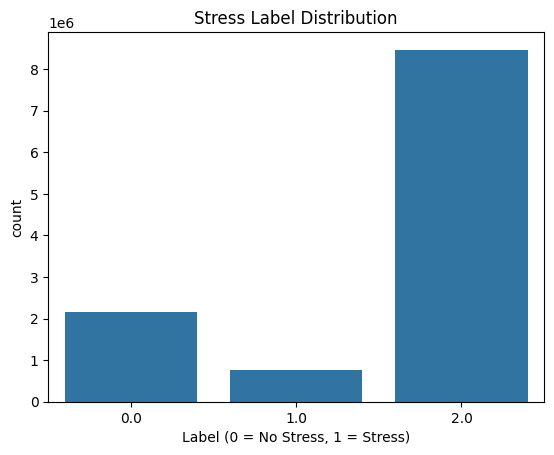

label
2.0    74.254920
0.0    18.961331
1.0     6.783748
Name: proportion, dtype: float64


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title("Stress Label Distribution")
plt.xlabel("Label (0 = No Stress, 1 = Stress)")
plt.show()

# Class percentages
print(df['label'].value_counts(normalize=True) * 100)


# Filter and re-map labels

In [7]:
# Keep only stress (1) and no-stress (0)
df_binary = df[df['label'].isin([0.0, 1.0])].copy()
df_binary['label'] = df_binary['label'].astype(int)


# Drop duplicates, Handle missing

In [8]:
# Drop duplicates
df_binary.drop_duplicates(inplace=True)

# Drop missing values (or fill if you prefer)
df_binary.dropna(inplace=True)

# Reset index
df_binary.reset_index(drop=True, inplace=True)


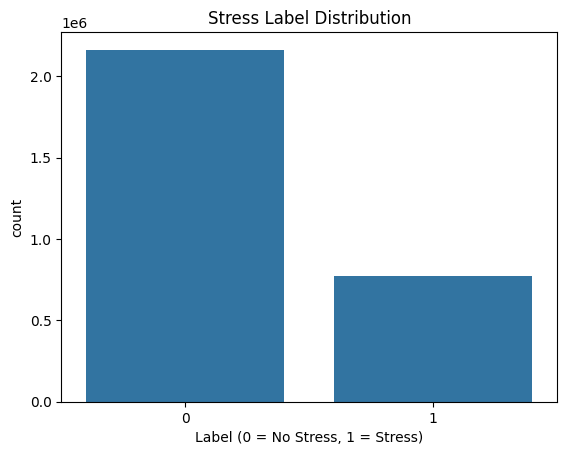

label
0    73.650312
1    26.349688
Name: proportion, dtype: float64


In [9]:
sns.countplot(x='label', data=df_binary)
plt.title("Stress Label Distribution")
plt.xlabel("Label (0 = No Stress, 1 = Stress)")
plt.show()

# Class percentages
print(df_binary['label'].value_counts(normalize=True) * 100)

# Classification model - Random Forest

In [14]:

# Step 1: Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [15]:
# 1. Features & target
features = ['EDA', 'HR', 'TEMP', 'X', 'Y', 'Z']
X = df_binary[features]
y = df_binary['label']


In [16]:
# 2. Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# SMOTE Analysis

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [19]:
print("After SMOTE:\n", pd.Series(y_train_resampled).value_counts())


After SMOTE:
 label
0    1729795
1    1729795
Name: count, dtype: int64


In [21]:
clf = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100, max_depth=15)

clf.fit(X_train_resampled, y_train_resampled)



RandomForestClassifier(max_depth=15, n_jobs=-1, random_state=42)

In [23]:
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))






[[409624  22826]
 [  4812 149904]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    432450
           1       0.87      0.97      0.92    154716

    accuracy                           0.95    587166
   macro avg       0.93      0.96      0.94    587166
weighted avg       0.96      0.95      0.95    587166



In [ ]:
# 6. Feature Importance
sns.barplot(x=rf.feature_importances_, y=features)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

# XG BOOST

In [27]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# PREPARE DATA

In [29]:
features = ['EDA', 'HR', 'TEMP', 'X', 'Y', 'Z']
X = df_binary[features]
y = df_binary['label']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [30]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)





In [31]:
xgb.fit(X_train_resampled, y_train_resampled)
y_pred = xgb.predict(X_test)  # Still test on original data


c:\Users\prina\Downloads\stress detection\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:29:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [32]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[385357  47093]
 [ 10594 144122]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93    432450
           1       0.75      0.93      0.83    154716

    accuracy                           0.90    587166
   macro avg       0.86      0.91      0.88    587166
weighted avg       0.92      0.90      0.90    587166

Accuracy: 0.9017535075259807
